<a href="https://colab.research.google.com/github/HashemFarhan/Histo/blob/main/Partial%20Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from skimage import io, color, exposure, transform
import matplotlib.pyplot as plt
from google.colab import drive
from numpy import asarray
import skimage.io as io
from skimage import filters, transform, util
import random as rnd
from PIL import Image
from glob import glob
import random as rnd
import pandas as pd
import numpy as np
import os

The following code is for partial data augmentation. The final procedures regarding the complete implementation are not yet fully honed.

In [15]:
from glob import glob

patches = glob("/content/drive/MyDrive/Colab Notebooks/IDC_regular_ps50_idx5/**/*.png", recursive=True)

In [54]:
print(len(patches))
print(type(patches))

277524
<class 'list'>


In [17]:
for i in range(5):
  print(patches[i])

/content/drive/MyDrive/Colab Notebooks/IDC_regular_ps50_idx5/9382/1/9382_idx5_x1851_y1401_class1.png
/content/drive/MyDrive/Colab Notebooks/IDC_regular_ps50_idx5/9382/1/9382_idx5_x1401_y1001_class1.png
/content/drive/MyDrive/Colab Notebooks/IDC_regular_ps50_idx5/9382/1/9382_idx5_x1351_y1401_class1.png
/content/drive/MyDrive/Colab Notebooks/IDC_regular_ps50_idx5/9382/1/9382_idx5_x1201_y1451_class1.png
/content/drive/MyDrive/Colab Notebooks/IDC_regular_ps50_idx5/9382/1/9382_idx5_x1401_y1501_class1.png


In [18]:
neg = []
pos = []
for i in range(len(patches)):
#  rand = rnd.randint(0, len(patches))
  x = patches[i]
  neg.append(x) if("class0.png" in x) else pos.append(x)

print("Frequency of Negative class:",len(neg))
print("Frequency of Positive class:",len(pos))
#print(round((len(neg) / len(patches) * 100), 2))
#print(round((len(pos) / len(patches) * 100), 2))

Frequency of Negative class: 198738
Frequency of Positive class: 78786


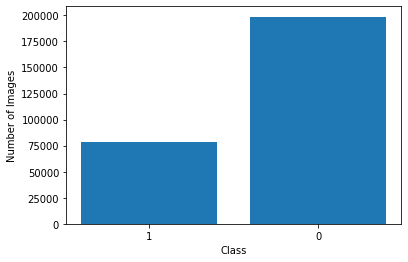

In [21]:
freq = [len(pos), len(neg)]
classes = ["1", "0"]

plt.bar(classes, freq)
plt.ylabel("Number of Images")
plt.xlabel("Class")
plt.show()

In [22]:
def augment(im):
  choose = rnd.randint(0, 4)
  if(choose == 0):
    x = [45, 90, 180, -45, -90]
    x = x[rnd.randint(0, 4)]
    rot = transform.rotate(im, angle=x, mode="wrap")
    return rot
  if(choose == 1):
    flip_u = np.flipud(im)
    return flip_u
  if(choose == 2):
    flip_r = np.fliplr(im)
    return flip_r
  if(choose == 3):
    blur = filters.gaussian(im, sigma=0.6, multichannel=True)
    return blur
  if(choose == 4):
    noise = util.random_noise(im, var=0.155**2)
    return noise

def show_image(image, title='Image', cmap_type='gray'):    
    plt.imshow(image, cmap=cmap_type)        
    plt.title(title)    
    plt.axis('off')    
    plt.show()

In [52]:
#I have used this empty list just for testing the method and for validating. It can be later be merged with the 
#dataset so that data can be fed to the model more efficiently 
augmented = []

#The number of iterations should be adjusted depending on the amount of 'new' data required, for the to be data perfectly balanced, the number of, do 119952 iteratoins


for x in range(252):
  name = pos[counter]
  image = io.imread(name)
  add = augment(image)
  augmented.append(add)


In [ ]:
#test_im = io.imread(pos[10])
#show_image(test_im)
#show_image(augmented[10])

for i in range(10):
  show_image(augmented[i])


In [36]:
pos = pos + augmented

In [37]:
labels = []
for i in range(len(patches)):
  labels.append(0) if("class0.png" in patches[i]) else labels.append(1)

data = {'Image_Name':patches, 'Class':labels}

dataframe = pd.DataFrame(data)

In [42]:
print(dataframe.describe())
print()
print(dataframe.info())

               Class
count  277524.000000
mean        0.283889
std         0.450884
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277524 entries, 0 to 277523
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Image_Name  277524 non-null  object
 1   Class       277524 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.2+ MB
None
